In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
from keras.datasets.reuters import load_data
from keras.datasets.reuters import get_word_index

In [5]:
(train_data, train_labels), (test_data, test_labels) = load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [8]:
print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)

(8982,) (8982,) (2246,) (2246,)


In [15]:
# max([max(sequence) for sequence in train_data])

In [24]:
word_index = get_word_index()
reversed_word_index = dict(
    [(value, word) for (word, value) in word_index.items()]
)
decoded_review = ' '.join(
    [ reversed_word_index.get(i - 3, '?') for i in train_data[0]] # 0, 1, 2는 패딩, 문서 시작, 사전에 없는 인덱스로 3을 뺀다.
)

In [25]:
decoded_review

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [27]:
# 샘플에 연결된 레이블은 토픽의 인덱스로 0 ~ 45 사이의 정수이다
# 분류할 뉴스 기사 클래스가 46개
print(min(train_labels), max(train_labels))

0 45


In [31]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [32]:
print(x_train.shape, x_test.shape)

(8982, 10000) (2246, 10000)


## 레이블을 벡터로 변환하는 방법
1. 레이블의 리스트를 정수 텐서로 변환하는 것
2. one-hot encoding, 범주형 데이터에 널리 사용되기 때문에 범주형 인코딩이라고도 부른다.

케라스에는 이를 위한 내장함수가 있다.

from keras.utils.np_utils import to_categorical

to_categorical(labels)

In [33]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [34]:
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [35]:
print(y_train.shape, y_test.shape)

(8982, 46) (2246, 46)


## 모델 구성

In [36]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [37]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [40]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:] 
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [41]:
model.fit(
    partial_x_train,
    partial_y_train,
    batch_size=512,
    epochs=20,
    validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 [==============================] - 15s 80ms/step - loss: 3.2563 - acc: 0.3582 - val_loss: 1.8392 - val_acc: 0.6260
Epoch 2/20
16/16 [==============================] - 1s 48ms/step - loss: 1.5854 - acc: 0.6771 - val_loss: 1.3346 - val_acc: 0.7190
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 1.1122 - acc: 0.7716 - val_loss: 1.1472 - val_acc: 0.7480
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.8531 - acc: 0.8188 - val_loss: 1.0465 - val_acc: 0.7740
Epoch 5/20
16/16 [==============================] - 1s 47ms/step - loss: 0.6877 - acc: 0.8586 - val_loss: 0.9836 - val_acc: 0.7910
Epoch 6/20
16/16 [==============================] - 1s 50ms/step - loss: 0.5543 - acc: 0.8865 - val_loss: 0.9227 - val_acc: 0.8160
Epoch 7/20
16/16 [==============================] - 1s 48ms/step - loss: 0.4256 - acc: 0.9159 - val_loss: 0.9184 - val_acc: 0.8130
Epoch 8/20
16/16 [==============================] - 1s 49ms/step - loss: 0.3502 - 

In [51]:
history = model.history.history

In [52]:
history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

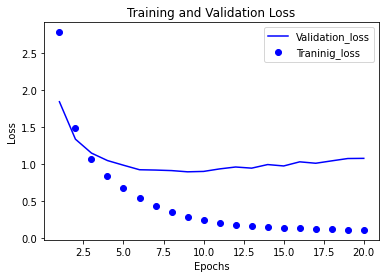

In [57]:
val_loss = history['val_loss']
loss = history['loss']
epochs = range(1, 21)

plt.plot(epochs, val_loss, 'b-', label='Validation_loss')
plt.plot(epochs, loss, 'bo', label='Traninig_loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

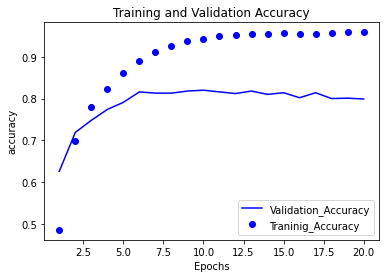

In [58]:
val_acc = history['val_acc']
acc = history['acc']
epochs = range(1, 21)

plt.plot(epochs, val_acc, 'b-', label='Validation_Accuracy')
plt.plot(epochs, acc, 'bo', label='Traninig_Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [59]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.fit(
    partial_x_train,
    partial_y_train,
    batch_size=512,
    epochs=9,
    validation_data=(x_val, y_val)
)


Epoch 1/9
16/16 [==============================] - 2s 65ms/step - loss: 3.1583 - acc: 0.2971 - val_loss: 1.7780 - val_acc: 0.6210
Epoch 2/9
16/16 [==============================] - 1s 47ms/step - loss: 1.5509 - acc: 0.6847 - val_loss: 1.2999 - val_acc: 0.7070
Epoch 3/9
16/16 [==============================] - 1s 47ms/step - loss: 1.0595 - acc: 0.7740 - val_loss: 1.1197 - val_acc: 0.7580
Epoch 4/9
16/16 [==============================] - 1s 46ms/step - loss: 0.8302 - acc: 0.8197 - val_loss: 1.0160 - val_acc: 0.7740
Epoch 5/9
16/16 [==============================] - 1s 46ms/step - loss: 0.6514 - acc: 0.8599 - val_loss: 0.9469 - val_acc: 0.8030
Epoch 6/9
16/16 [==============================] - 1s 48ms/step - loss: 0.4970 - acc: 0.8963 - val_loss: 0.9072 - val_acc: 0.8060
Epoch 7/9
16/16 [==============================] - 1s 46ms/step - loss: 0.4126 - acc: 0.9126 - val_loss: 0.9000 - val_acc: 0.7970
Epoch 8/9
16/16 [==============================] - 1s 46ms/step - loss: 0.3442 - acc: 0.92

In [62]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 0.9941 - acc: 0.7872


대략 78%의 정확도를 달성하였다. 균형 잡힌 이진 분류 문제에서 완전히 무작위로 분류하면 50%의 정확도를 달성한다. 이 문제는 불균형한 데이터셋을 사용하므로 무작위로 분류하면 18% 정도를 달성하는데 결과는 꽤 좋은 편이다.

In [64]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)/len(test_labels))

0.19991095280498664

## 새로운 데이터에 대해 예측하기

In [66]:
predictions = model.predict(x_test)

In [69]:
# predications[0].shape
# sum(predication[0])
np.argmax(predictions[0])

3

### 레이블과 손실을 다루는 방법

레이블을 정수 인코딩 하는 경우 정수 텐서로 변환이 필요한데

y_train = np.array(train_labels)
y_test = np.array(test_labels)

이 방식을 사용하기 위해서 손실함수를 sparse_categorical_crossentropy를 사용해야한다.

model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])

이 손실 함수는 인터페이스만 다르고 수학적으로는 categorical_crossentropy와 동일하다

### 충분히 큰 중간층을 두어야 하는 이유

마지막 출력이 46차원이기 때문에 히든 유닛이 46개보다 많이 적어서는 안된다. 46차원보다 훨씬 작은 중간층을 두면 병목이 발생한다.

많은 정보(클래스 46개의 분할 초평면을 복원하기에 충분한 정보)를 중간층의 저차원 표현 공간으로 압축하려고 했기 때문이다. 필요한 정보를 저차원에서 모두 표현하지 못할 수 있다.